<a href="https://colab.research.google.com/github/JamesAttwood1910/Diplomado_USACH/blob/main/Segunda_Entrega_Taller_de_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Liberias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importacion de los datos

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Comprensión de los datos

## 1) Adquisición de datos iniciales

Los datos utilizados en este proyecto se descargaron de Kaggle en el siguiente [vinculo](https://www.kaggle.com/arnabbiswas1/microsoft-azure-predictive-maintenance). 

Al principio los datos son en los siguientes cinco bases de datos: 

PdM_Machines.csv - Provee información sobre modelo y edad de cada maquina. 

PdM_telemetry.csv - Consiste en un promedio por hora voltaje, rotación, presión, y vibración, recopilados para 100 maquinas en 2015. 

PdM_errors.csv - Consiste en los errores encontrados por las maquinas. Ya que estos errores no suspenden el trabajo de las maquinas, no se clasifican como fallas. La hora y fecha del error se redondea a la hoa mas cercana. 

PdM_maint.csv - Información del remplazo de componentes de las maquinas. Se remplazan en dos situaciones 1. Durante una mantención programada 2. Cuando un componente falla y se remplaza de forma no programada. Este segundo tipo se considera como una falla y tambien esta almacenado en PdM_failures.csv. La hora y fecha del remplazo se redondea a la hoa mas cercana. 

PdM_failures.csv - Cada observación representa el replazamiento de un componente debido a una falla. La hora y fecha del error se redondea a la hoa mas cercana. Esta base de datos es un subconjunto de PdM_maint.csv. 


## 2) Descripción de datos

La descripción de los datos y sus variables esta disponible en el excel adjuntado. 

## 3) Exploración

### 3.1) Maquinas 

PdM_Machines.csv - Provee información sobre modelo y edad de cada maquina. 

In [ ]:
PdM_machines = pd.read_csv("/content/drive/MyDrive/TallerProyecto/PdM_machines.csv")

In [ ]:
PdM_machines.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


In [ ]:
PdM_machines.isna().sum() # no hay missings

machineID    0
model        0
age          0
dtype: int64

In [ ]:
PdM_machines.duplicated().sum() # no hay obsevraciones duplicados

0

In [ ]:
PdM_machines['machineID'].nunique  # Hay 100 unique machines. 

<bound method IndexOpsMixin.nunique of 0       1
1       2
2       3
3       4
4       5
     ... 
95     96
96     97
97     98
98     99
99    100
Name: machineID, Length: 100, dtype: int64>

In [ ]:
PdM_machines['machineID'].value_counts().sort_values()  

100    1
97     1
96     1
95     1
94     1
      ..
2      1
23     1
24     1
10     1
1      1
Name: machineID, Length: 100, dtype: int64

In [ ]:
PdM_machines['model'].value_counts() # hay 4 modelos de maquina

model3    35
model4    32
model2    17
model1    16
Name: model, dtype: int64

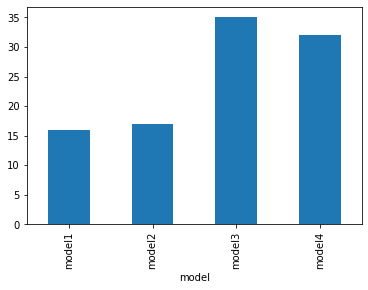

In [ ]:
# Graficar maquinas segun tipo de modelo

PdM_machines.groupby(by = 'model')['model'].count().plot.bar()

In [ ]:
PdM_machines['age'].describe()

count    100.000000
mean      11.330000
std        5.856974
min        0.000000
25%        6.750000
50%       12.000000
75%       16.000000
max       20.000000
Name: age, dtype: float64

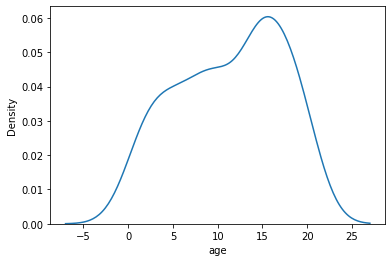

In [ ]:
sns.kdeplot(data=PdM_machines, x='age')

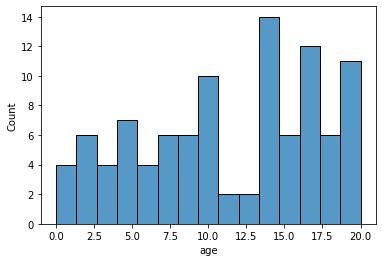

In [ ]:
sns.histplot(data = PdM_machines, x ='age', bins = 15) # Acercandose a un bimodal distribution. Sin embargo el primer pico no es tan pronunciado. 

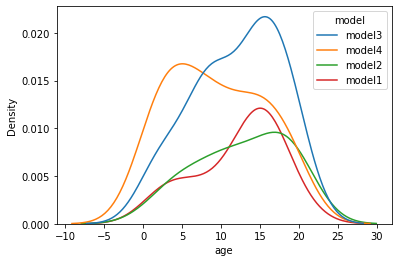

In [ ]:
sns.kdeplot(data=PdM_machines, x='age', hue="model") # modelo 4 de las maquinas es responsable por las maquinas mas jovenes. 

In [ ]:
# Calcular y graficar la edad promedio para cada tipo de modelo

PdM_machines.groupby(by = 'model')['age'].describe()

# Modelo 4 es lo mas joven con un promedio de 9.34 años y un mediano de 9.5%
# Models 1, 2, y 3 son mas viejos con promedios de 12 años y medianos de 14 años. 

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
model1,16.0,12.250000,5.385165,2.0,9.25,14.0,16.00,20.0
model2,17.0,12.764706,5.847322,2.0,10.00,14.0,18.00,20.0
model3,35.0,12.028571,5.607168,1.0,8.50,14.0,17.00,20.0
model4,32.0,9.343750,6.099230,0.0,4.00,9.5,14.25,20.0


### 3.2) Sensores

PdM_telemetry.csv - Consiste en un promedio por hora voltaje, rotación, presión, y vibración, recopilados de los sensores de 100 maquinas en 2015. 

In [ ]:
PdM_telemetry = pd.read_csv("/content/drive/MyDrive/TallerProyecto/PdM_telemetry.csv")

In [ ]:
PdM_telemetry.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [ ]:
PdM_telemetry.info()

# 876100 observaciones, 6 variables. Dtype esta bien salvo por datetime que requiere una transformacion. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876100 entries, 0 to 876099
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   datetime   876100 non-null  object 
 1   machineID  876100 non-null  int64  
 2   volt       876100 non-null  float64
 3   rotate     876100 non-null  float64
 4   pressure   876100 non-null  float64
 5   vibration  876100 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 40.1+ MB


In [ ]:
PdM_telemetry.isna().sum() # No hay valores faltantes. 

datetime     0
machineID    0
volt         0
rotate       0
pressure     0
vibration    0
dtype: int64

In [ ]:
PdM_telemetry.duplicated().sum() # No hay duplicados

0

In [ ]:
PdM_telemetry.shape

(876100, 6)

In [ ]:
PdM_telemetry['machineID'].nunique() # hay 100 unicos machineID (lo mismo que para PdM_machines)

100

In [ ]:
PdM_telemetry[['volt', 'rotate', 'pressure', 'vibration']].describe()

,volt,rotate,pressure,vibration
count,876100.000000,876100.000000,876100.000000,876100.000000
mean,170.777736,446.605119,100.858668,40.385007
std,15.509114,52.673886,11.048679,5.370361
min,97.333604,138.432075,51.237106,14.877054
25%,160.304927,412.305714,93.498181,36.777299
50%,170.607338,447.558150,100.425559,40.237247
75%,181.004493,482.176600,107.555231,43.784938
max,255.124717,695.020984,185.951998,76.791072


El analisis a continuacion verifica la distribucion, varianca, y presencia de outliers para cada una de las variables de volt, rotate, pressure, y	vibration. 

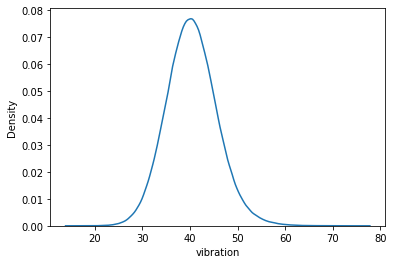

In [ ]:
# vibration

sns.kdeplot(data = PdM_telemetry, x = 'vibration') # Distribucion normal

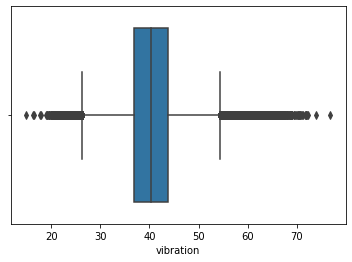

In [ ]:
sns.boxplot(data = PdM_telemetry, x = 'vibration') # Outliers en grafica de caja estos pueden ser importantes en la prediccion de fallas. 

In [ ]:
# Una funcion para ver si la media es mas grande que la desviacion estander. 
# Si la media es mas grande la variable podria ser una opcion para un clustering

def sd_media(variable): 
  if PdM_telemetry[variable].std() > PdM_telemetry[variable].mean():
    print('Alta varianca en variable', variable, 'puede ser opcion para clustering')
  else:
    print('No alta varianca')

In [ ]:
sd_media('vibration')

No alta varianca


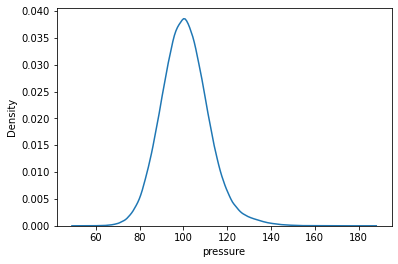

In [ ]:
# pressure

sns.kdeplot(data = PdM_telemetry, x = 'pressure') # Distribucion normal

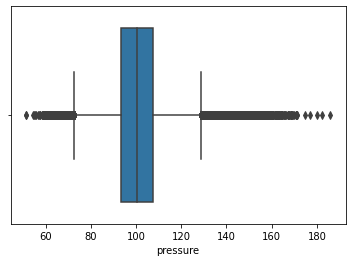

In [ ]:
sns.boxplot(data = PdM_telemetry, x = 'pressure') # Outliers en grafica de caja estos pueden ser importantes en la prediccion de fallas. 

In [ ]:
sd_media('pressure')

No alta varianca


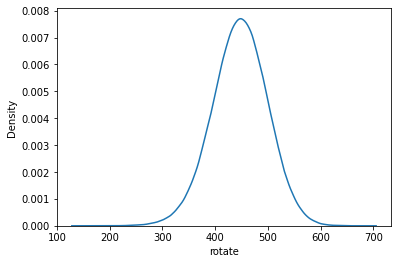

In [ ]:
# rotate 

sns.kdeplot(data = PdM_telemetry, x = 'rotate') # distribucion normal - para modelos que requieren esta distribucion ahora se sabe que para rotate se cumple

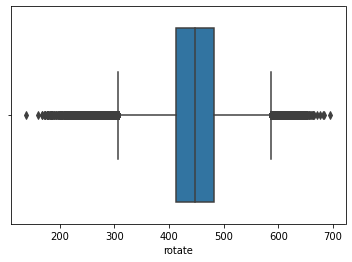

In [ ]:
sns.boxplot(data = PdM_telemetry, x = 'rotate') # Outliers en grafica de caja estos pueden ser importantes en la prediccion de fallas. 

In [ ]:
sd_media('rotate')

No alta varianca


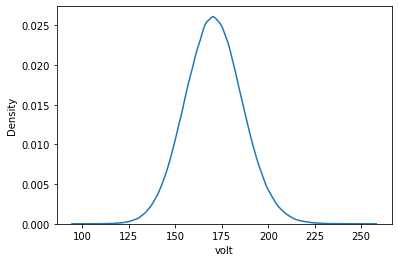

In [ ]:
# volt

sns.kdeplot(data = PdM_telemetry, x = 'volt') # distribucion normal - para modelos que requieren esta distribucion ahora se sabe que para voltage se cumple

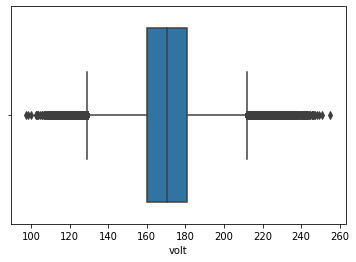

In [ ]:
sns.boxplot(data = PdM_telemetry, x = 'volt') # Outliers en grafica de caja estos pueden ser importantes en la prediccion de fallas. 

In [ ]:
sd_media('volt')

No alta varianca


In [ ]:
# correlacion

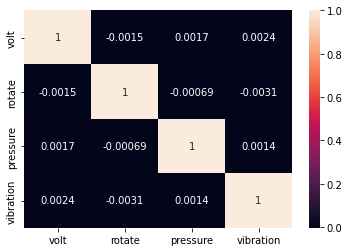

In [ ]:
sns.heatmap(PdM_telemetry[['volt', 'rotate', 'pressure', 'vibration']].corr(), annot=True) # no hay correlacion entre las variables. 

A raiz del analisis anterior se ha averiguado que:

Hay que escalar las variables continuous ya que en la etapa de modelamiento modelos que utilizan la distancia euclidian se van a usar. 

Las graficas de caja exponen la presencia de outliers. A continuacion se va a verificar si estos outliers aun existen tras agrupar los datos segun tipo de modelo. Los outliers aun existirán con esta agrupacion? 

No hay correlación entre las variables continuous. A continuación se va a verificar si esto se mantiene con agrupación por tipo de modelo. Si eso es el caso, mas adelante en la sección de 'Preparación de los datos - construcción' se creará unas variables nuevas para calcular la media, max, min, y desviación estander para las ultimas 3, 6, y 12 horas para volt, pressure, rotate, y vibration.  



#### 3.2.1) Sensores agrupados por modelo

In [ ]:
PdM_telemetry_machines = pd.merge(PdM_telemetry, PdM_machines, on = ['machineID'], how = 'outer')

# PdM_telemetry y PdM_machines se juntan con un merge. 

In [ ]:
PdM_telemetry.shape

(876100, 6)

In [ ]:
PdM_telemetry_machines.shape

(876100, 8)

In [ ]:
# volt agrupado por tipo de modelo

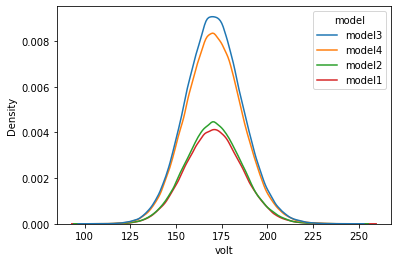

In [ ]:
sns.kdeplot(data = PdM_telemetry_machines, x = 'volt', hue = 'model') # aun la distribucion es normal 

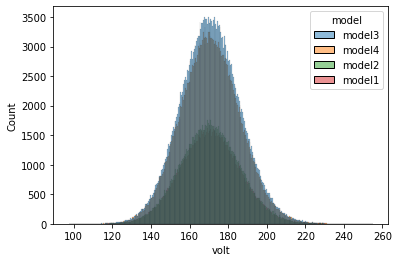

In [ ]:
sns.histplot(data = PdM_telemetry_machines, x = 'volt', hue = 'model')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


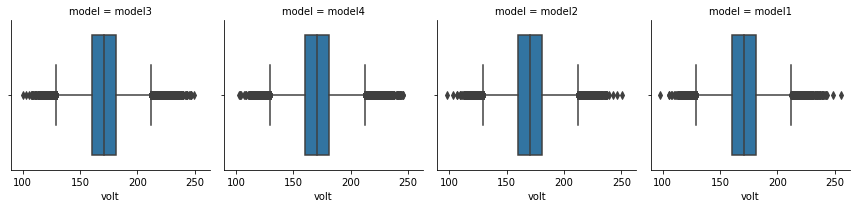

In [ ]:
g = sns.FacetGrid(PdM_telemetry_machines, col = 'model')

g.map(sns.boxplot, "volt") # Aun hay outliers

In [ ]:
# rotate agrupado por modelo de maquina

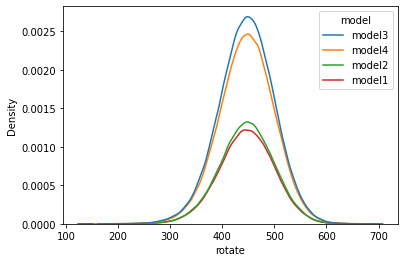

In [ ]:
sns.kdeplot(data = PdM_telemetry_machines, x = 'rotate', hue = 'model') # aun la distribucion es normal 

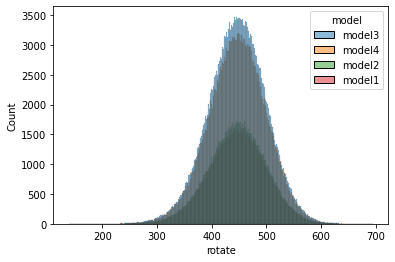

In [ ]:
sns.histplot(data = PdM_telemetry_machines, x = 'rotate', hue = 'model')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


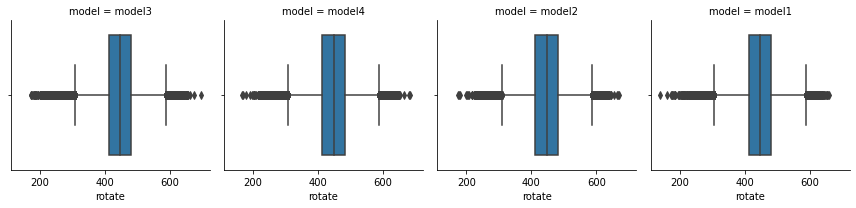

In [ ]:
g = sns.FacetGrid(PdM_telemetry_machines, col = 'model')

g.map(sns.boxplot, "rotate") # Aun hay outliers

In [ ]:
# Pressure agrupado por modelo de maquina

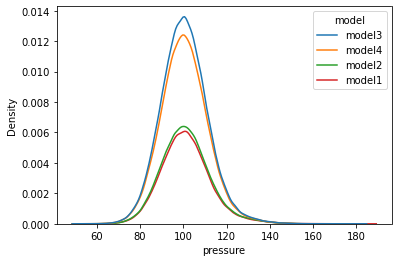

In [ ]:
sns.kdeplot(data = PdM_telemetry_machines, x = 'pressure', hue = 'model') # aun la distribucion es normal 

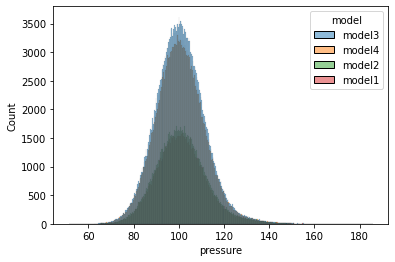

In [ ]:
sns.histplot(data = PdM_telemetry_machines, x = 'pressure', hue = 'model')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


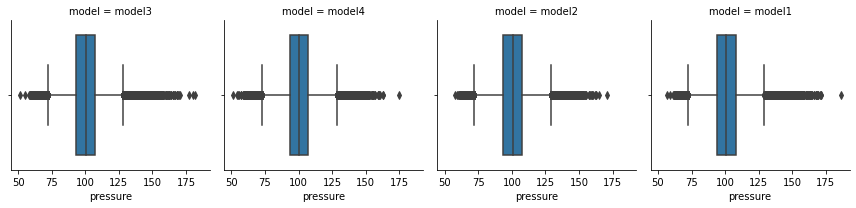

In [ ]:
g = sns.FacetGrid(PdM_telemetry_machines, col = 'model')

g.map(sns.boxplot, "pressure") # Aun hay outliers

In [ ]:
# Vibration agrupado por modelo de maquina

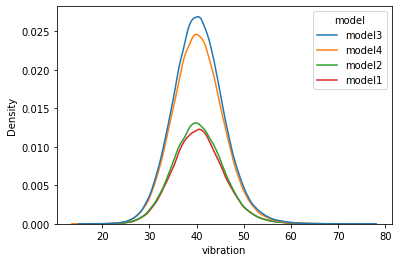

In [ ]:
sns.kdeplot(data = PdM_telemetry_machines, x = 'vibration', hue = 'model') # aun la distribucion es normal 

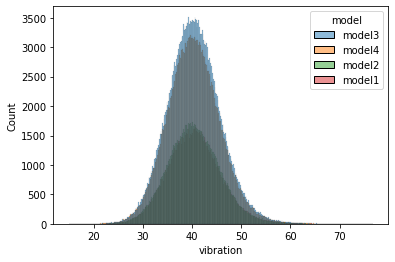

In [ ]:
sns.histplot(data = PdM_telemetry_machines, x = 'vibration', hue = 'model')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


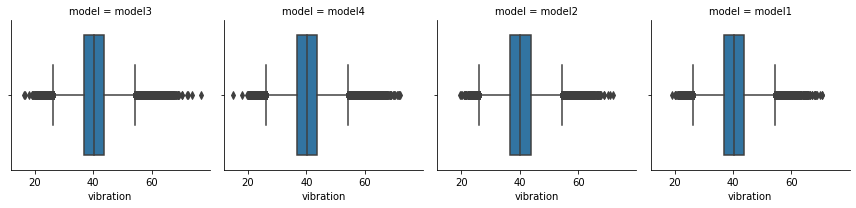

In [ ]:
g = sns.FacetGrid(PdM_telemetry_machines, col = 'model')

g.map(sns.boxplot, "vibration") # Aun hay outliers

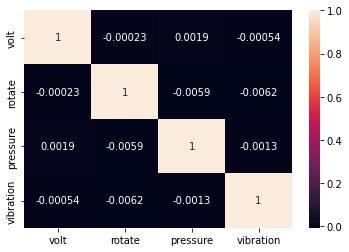

In [ ]:
sns.heatmap(PdM_telemetry_machines[PdM_telemetry_machines['model'] == 'model1'][['volt', 'rotate', 'pressure', 'vibration']].corr()
, annot=True) # para modelo1 no hay correlaciones

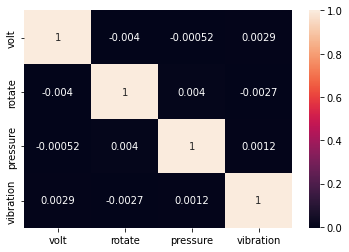

In [ ]:
sns.heatmap(PdM_telemetry_machines[PdM_telemetry_machines['model'] == 'model2'][['volt', 'rotate', 'pressure', 'vibration']].corr()
, annot=True) # para modelo2 no hay correlaciones

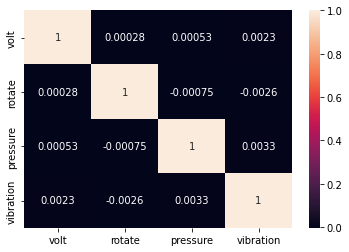

In [ ]:
sns.heatmap(PdM_telemetry_machines[PdM_telemetry_machines['model'] == 'model3'][['volt', 'rotate', 'pressure', 'vibration']].corr()
, annot=True)# para modelo3 no hay correlaciones

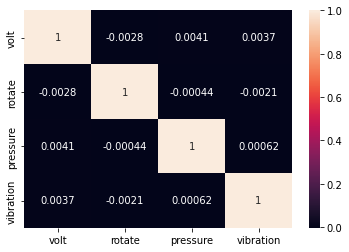

In [ ]:
sns.heatmap(PdM_telemetry_machines[PdM_telemetry_machines['model'] == 'model4'][['volt', 'rotate', 'pressure', 'vibration']].corr()
, annot=True) # para modelo4 no hay correlaciones

In [ ]:
# No hay correlaciones con agrupacion por modelo. 

Despues de analizar los datos de los sensores con agrupacion por modelo de maquina las concluciones no han cambiado. Hay outliers para volt, pressure, rotate, y vibration. Su distribucion es normal. Al analizar los graficos de caja se nota que los outliers existen ya que hay un alta concentracion de 
registros entre el 1Q y 3Q. El IQR es chico. Esto resulta que hay varios valores fuera de 3Q + (1.5 * IQR) y 1Q - (1.5 * IQR). Los registros fuera de estos umbrales estan clasificados como outliers. Se van a mantener ya que podrian ser claves en la prediccion de una falla.  

### 3.4) Errores

PdM_errors.csv - Consiste en los errores encontrados por las maquinas. Ya que estos errores no suspenden el trabajo de las maquinas, no se clasifican como fallas. La hora y fecha del error se redondea a la hoa mas cercana. 

In [ ]:
PdM_errors = pd.read_csv('/content/drive/MyDrive/TallerProyecto/PdM_errors.csv')

In [ ]:
PdM_errors

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4
...,...,...,...
3914,2015-11-21 08:00:00,100,error2
3915,2015-12-04 02:00:00,100,error1
3916,2015-12-08 06:00:00,100,error2
3917,2015-12-08 06:00:00,100,error3


In [ ]:
PdM_errors.info() # errorID requiere transformacion. Es multi nominal asi que se usará one hot encoding. 
# Datetime requiere transformacion a Dtype datetime con nuevas variables por hora, minuto, dia de la semana, dia del mes, mes, ano creadas.  
# Mas adelante con feature engineering se creará 5 variables nuevas para dias desde ultimo error (para cada tipo de error). 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3919 entries, 0 to 3918
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   3919 non-null   object
 1   machineID  3919 non-null   int64 
 2   errorID    3919 non-null   object
dtypes: int64(1), object(2)
memory usage: 92.0+ KB


In [ ]:
PdM_errors.isna().sum() # no hay missings

datetime     0
machineID    0
errorID      0
dtype: int64

In [ ]:
PdM_errors.duplicated().sum() # no hay duplicados

0

In [ ]:
PdM_errors['machineID'].nunique() # 100 maquinas

100

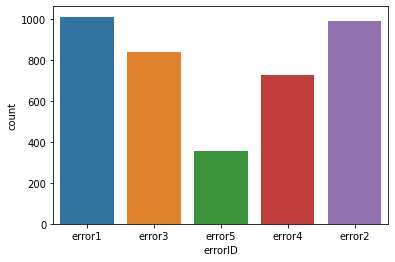

In [ ]:
sns.countplot(data = PdM_errors, x = 'errorID') # error 5 es menos comun. 
# Error 5 no se va a agrupar con otro error ya que no se sabe como los tipos de errores se relacion entre si. 

A continuación PdM_errors se junta con Pdm_telemetry y PdM_machines. Así se puede analizar como los errores diferencian segun modelo. 

In [ ]:
PdM_errors_machines = pd.merge(PdM_errors, PdM_machines, on = ['machineID'], how = 'outer')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


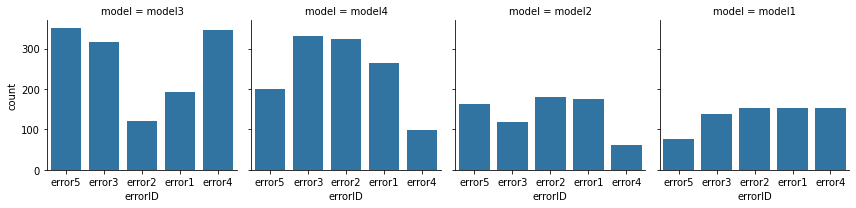

In [ ]:
g = sns.FacetGrid(PdM_errors_machines, col = 'model')

g.map(sns.countplot, "errorID") # Hay diferencia entre cantidad y tipo de error mas comun en los diferentes modelos. 

### 3.5) Mantencion

PdM_maint.csv - Información del remplazo de componentes de las maquinas. Se remplazan en dos situaciones 1. Durante una mantención programada 2. Cuando un componente falla y se remplaza de forma no programada. Este segundo tipo se considera como una falla y tambien esta almacenado en PdM_failures.csv. La hora y fecha del remplazo se redondea a la hoa mas cercana. 

In [ ]:
PdM_maint = pd.read_csv('/content/drive/MyDrive/TallerProyecto/PdM_maint.csv')

In [ ]:
PdM_maint

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4
...,...,...,...
3281,2015-10-10 06:00:00,100,comp3
3282,2015-10-25 06:00:00,100,comp4
3283,2015-11-09 06:00:00,100,comp4
3284,2015-12-09 06:00:00,100,comp2


In [ ]:
PdM_maint.isna().sum() # no hay missing

datetime     0
machineID    0
comp         0
dtype: int64

In [ ]:
PdM_maint.duplicated().sum() # no hay duplicados

0

In [ ]:
3286 - 761 # mantencion programada = mantencion total - numero de fallas. 

2525

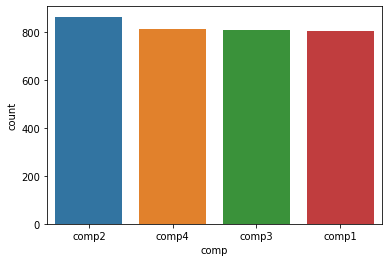

In [ ]:
sns.countplot(data = PdM_maint, x = 'comp') # parecido nivel de mantencion tras mantencion de los 4 componentes. 

Segun inforamcion de este base de datos PdM_maint contiene informacion de mantencion programada y mantencion despues de fallas. 

Asi que duplica informacion contenida en PdM_fallas. Sin embargo, estos duplicaciones se van a mantener ya que exponen que una maquina recibio mantencion despues de que falló.

Hay 3286 registros de maintencion (fallas y programada). Segun el numero de registros en PdM_failure hay 761 fallas. Eso sugiere que 761 de los registros en PdM_maint eran por fallas, mientras los 2525 registros que quedan se tratan de mantencion programada. 

Datetime requiere transformacion a Dtype datetime con nuevas variables por hora, minuto, dia de la semana, dia del mes, mes, ano creadas.  

A continuación PdM_errors se juntará con Pdm_telemetry y PdM_machines. Así se puede analizar como la mantención diferencia segun modelo. 

En la seccion de Construción se crearán 4 variables nuevas para dias desde ultimo mantencion (para cada tipo de mantencion). 
 

In [ ]:
PdM_maint_machines = pd.merge(PdM_maint, PdM_machines, on = ['machineID'], how = 'outer')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


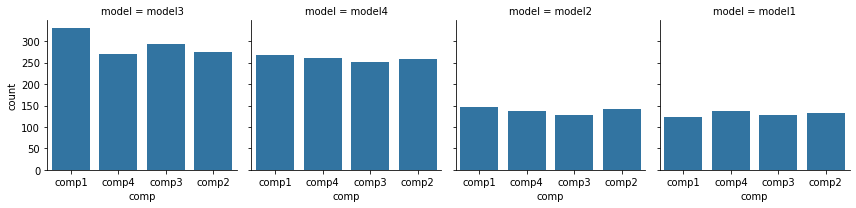

In [ ]:
g = sns.FacetGrid(PdM_maint_machines, col = 'model')

g.map(sns.countplot, "comp")  # Al agrupar por modelos se nota diferencias en la mantencion de los diferentes modelos. Modelos 3 y 4 han recibido mas mantencion. 

### 3.6) Fallas (Target data)

PdM_failures.csv - Cada observación representa el replazamiento de un componente debido a una falla. La hora y fecha del error se redondea a la hoa mas cercana. Esta base de datos es un subconjunto de PdM_maint.csv. 

In [ ]:
PdM_failures = pd.read_csv('/content/drive/MyDrive/TallerProyecto/PdM_failures.csv')

In [ ]:
PdM_failures # 761 fallas

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4
...,...,...,...
756,2015-11-29 06:00:00,99,comp3
757,2015-12-14 06:00:00,99,comp4
758,2015-02-12 06:00:00,100,comp1
759,2015-09-10 06:00:00,100,comp1


In [ ]:
PdM_failures.info()
# Datetime requiere transformacion a Dtype datetime con nuevas variables por hora, minuto, dia de la semana, dia del mes, mes, ano creadas.  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   761 non-null    object
 1   machineID  761 non-null    int64 
 2   failure    761 non-null    object
dtypes: int64(1), object(2)
memory usage: 18.0+ KB


In [ ]:
PdM_failures.isna().sum()

datetime     0
machineID    0
failure      0
dtype: int64

In [ ]:
PdM_failures.duplicated().sum()

0

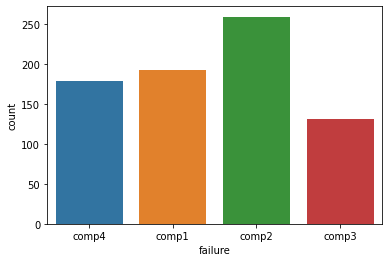

In [ ]:
sns.countplot(data = PdM_failures, x = 'failure') # comp2 tiene mas fallas

A continuación PdM_failures se juntará con PdM_errors, Pdm_telemetry y PdM_machines. Así se puede analizar como las fallas diferencian segun modelo. 

In [ ]:
PdM_failures_machines = pd.merge(PdM_failures, PdM_machines, on = ['machineID'], how = 'outer') # Sabemos que maquina 6 y 77 nunca hayan fallado. 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


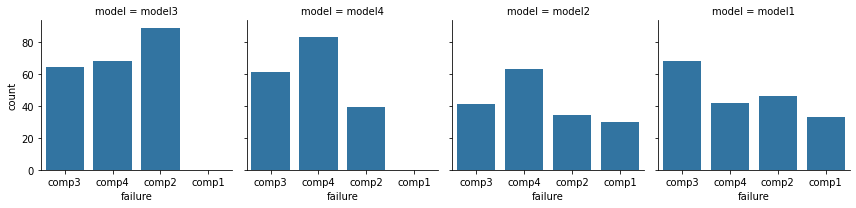

In [ ]:
g = sns.FacetGrid(PdM_failures_machines, col = 'model')

g.map(sns.countplot, "failure")  # tipo de falla y cantidad varian segun modelo de maquina. 

En la sección de construcción se creará una segunda target variable que será binominal (dice que si había una falla o no. En vez de tipo de falla (miltinominal))

## 4) Concluciones de calidad

Despues de la etapa de exploración se puede concluir...

Todos las variables en los 5 bases de datos (PdM_machines, PdM_telemetry, PdM_errors, PdM_maint, PdM_fallas) no tienen valores faltantes. PdM_maint tiene registros para 2014 que se removerán ya que solo hay datos de los sensores de las maquinas (PdM_telemetry) para 2015 hasta el principio de 2016. Las 4 bases de datos de PdM_errors, PdM_maint, PdM_fallas, y PdM_machines se van a vincular con PdM_telemetry). Algunas estrategias para mejorar las variables y para crear nuevas variables son: 

- Todas las variables de Datetime requiere transformacion a Dtype datetime con nuevas variables por hora, minuto, dia de la semana, dia del mes, mes, ano creadas. 
- La variable de age en PdM_machines se podría escalar. Se usará Standard Scaler ya que no tiene outliers, y su distribución no es normal. Se espera que con el escalamiento la distribución se vuelva mas normal. 
- Las variables de volt, vibration, pressure, rotation requieren escalamiento. Se usará Min Max scaler ya que tienen una distribución normal y outliers. Queremos mantener estos outliers asi que se usará Min Max Scaler. 
- ya que no hay correlacion entre las variables de volt, vibration, pressure, rotation, se crearán nuevas variables para la media, min, max y desviación estander, para los ultimos 3, 6, y 12 horas. 
- One hot encoding se aplicará a la variable errorID. Despues para cada de sus nuevas columnas se creará una variable nueva en la cual se calculará los dias desede el ultimo error de este tipo. 
- One hot encoding se aplicará a la variable maintenance. Despues para cada de sus nuevas columnas se creará una variable nueva en la cual se calculará los dias desede el ultimo mantencion de este tipo.
- Una nueva variable se creará (falla_binomial). Será binomial para representar si había una falla de cualquiere tipo o no. Despues se usará para crear tres target variables que representarán si habia una falla de cualquier tipo en los proximos 3, 6, o 12 horas. Estas 3 variables (falla proximos 3 hora, falla proximos 6 horas, falla proximos 12 horas) serán los targets finales. falla_binomial no se usará en el modelo final. 



## 5) Preparación

### 5.1) Integración

Se juntan las bases de datos de PdM_telemetrey, PdM_machine, PdM_error, PdM_maint, y PdM_error. 
Se utilizará un pd.merge. 

In [ ]:
# primero PdM_telemetry con PdM_machines

In [ ]:
PdM_telemetry.shape # al comenzar hay 876100 observaciones y 6 columnas. 

(876100, 6)

In [ ]:
PdM_final = pd.merge(PdM_telemetry, PdM_machines, on = ['machineID'], how = 'outer')

In [ ]:
# segundo PdM_final con PdM_error

In [ ]:
PdM_final = pd.merge(PdM_final, PdM_errors, on = ['machineID', 'datetime'], how = 'outer')

In [ ]:
# PdM_final con PdM_maint

In [ ]:
PdM_final = pd.merge(PdM_final, PdM_maint, on = ['machineID', 'datetime'], how = 'outer')

In [ ]:
# PdM_final con PdM_failures

In [ ]:
PdM_final = pd.merge(PdM_final, PdM_failures, on = ['machineID', 'datetime'], how = 'outer')

In [ ]:
PdM_final

,datetime,machineID,volt,rotate,pressure,vibration,model,age,errorID,comp,failure
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,model3,18.0,NaN,NaN,NaN
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,model3,18.0,NaN,NaN,NaN
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,model3,18.0,NaN,NaN,NaN
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,model3,18.0,NaN,NaN,NaN
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,model3,18.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
877604,2014-12-28 06:00:00,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,comp3,NaN
877605,2014-08-30 06:00:00,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,comp4,NaN
877606,2014-09-14 06:00:00,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,comp1,NaN
877607,2014-11-28 06:00:00,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,comp3,NaN


In [ ]:
PdM_final.shape

(877609, 11)

Despues de juntar los bases de datos hay 877609 observaciones y 11 columnas.

#### 5.1.1) Renombrar columnas

In [ ]:
# Renombrar columnas de PdM_final

In [ ]:
PdM_final.head()

,datetime,machineID,volt,rotate,pressure,vibration,model,age,errorID,comp,failure
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,model3,18.0,NaN,NaN,NaN
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,model3,18.0,NaN,NaN,NaN
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,model3,18.0,NaN,NaN,NaN
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,model3,18.0,NaN,NaN,NaN
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,model3,18.0,NaN,NaN,NaN


In [ ]:
PdM_final = PdM_final.rename(columns = {'datetime': 'date',
                            'age':'model_age',
                            'comp':'maintenance'})

In [ ]:
PdM_final

,date,machineID,volt,rotate,pressure,vibration,model,model_age,errorID,maintenance,failure
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,model3,18.0,NaN,NaN,NaN
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,model3,18.0,NaN,NaN,NaN
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,model3,18.0,NaN,NaN,NaN
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,model3,18.0,NaN,NaN,NaN
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,model3,18.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
877604,2014-12-28 06:00:00,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,comp3,NaN
877605,2014-08-30 06:00:00,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,comp4,NaN
877606,2014-09-14 06:00:00,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,comp1,NaN
877607,2014-11-28 06:00:00,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,comp3,NaN


### 5.2) Limpieza

En esta sección se realiza una limpieza:

- Transformar date a dtype datetime.
- Crear nuevas variables (año, mes, día de la semana, hora) para time. 
- Remover registros del año 2014 ya que solo hay datos de los sensores entre 2015-01-01 y 2016-01-01.
- Transfromar machineID a dtype object. 
- Escalar los datos de los sensores. Se utilizará min max scaler ya que se quiere mantener la forma de la distribución orginal, no se quiere perder el valor de los outliers ya que podrian ser claves en la identificación de fallas. Ademas las variables para los sensores ya tienen una distribución normal. 
- Escalar model_age de maquina. Se va a usar standard scaler para age, ya que no tienen una distribucion normal, y esa asumpcion se requiere para modeles como regression logistica. Ademas No tiene outliers que se quiere mantener. Tambien se quiere reducir el rango de valores para reducir el tiempo para entrenar modelos que usar distancia euclidian (KNN, SVM). 
- Remplazar missings en ErrorID, maintenence, y failure con 0, ya que estos missings representan registros cuando no había un error, mantencion o falla. No son missings. 
- Crear una segunda variable target. Será binominal para falla. Representará si había una falla sin diferenciar entre tipo de falla. La variables multinominal no se usará y borrará de la base de datos. 


In [ ]:
# Transformar date a dtype datetime

In [ ]:
PdM_final['date'] = PdM_final['date'].astype('datetime64[ns]')

In [ ]:
# Crear nuevas variables para time

In [ ]:
PdM_final['year'] = PdM_final['date'].dt.year # Año
PdM_final['month'] = PdM_final['date'].dt.month # Mes
PdM_final['weekday'] = PdM_final['date'].dt.weekday # Día de la semana
PdM_final['hour'] = PdM_final['date'].dt.hour # Hora 

In [ ]:
# Remover año de 2014. 

In [ ]:
# PdM_telemetry tienen 2015-01-01 hasta 2016-01-01

In [ ]:
PdM_final = PdM_final[PdM_final['year'].isin([2015,2016])]

In [ ]:
PdM_final.shape # 877209 observaciones

(877209, 15)

In [ ]:
# machineID transfromar a dtype object

In [ ]:
PdM_final['machineID'] = PdM_final['machineID'].astype('object')

In [ ]:
# Min Max Scaler sensores

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns = ['volt', 'rotate' ,'pressure', 'vibration']
for x in columns:
  scaler.fit(PdM_final[x].values.reshape(-1, 1))
  PdM_final[x] = scaler.transform(PdM_final[x].values.reshape(-1, 1))

In [ ]:
# revisar la distribcuion de age y si tiene outliers. 

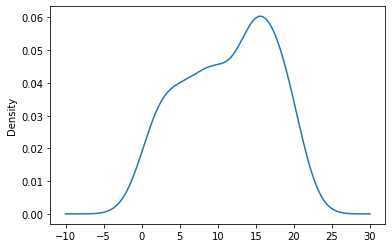

In [ ]:
PdM_machines['age'].plot(kind = 'kde') # No es una distribcuion normal

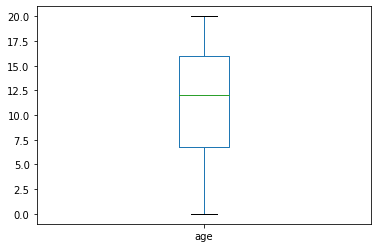

In [ ]:
PdM_machines['age'].plot(kind = 'box') # No hay outliers

In [ ]:
# Escalar model_age con StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(PdM_final['model_age'].values.reshape(-1, 1))
PdM_final['model_age_scaled'] = scaler.transform(PdM_final['model_age'].values.reshape(-1, 1))

In [ ]:
# remplazar na con 0 en errrorID

In [ ]:
PdM_final['errorID'] = PdM_final['errorID'].fillna(0)

In [ ]:
# remplazar na con 0 en errrorID 

In [ ]:
PdM_final['maintenance'] = PdM_final['maintenance'].fillna(0)

In [ ]:
# failure - fill na con 0

In [ ]:
PdM_final['failure'].fillna(0).value_counts()

0        876087
comp2       386
comp1       291
comp4       255
comp3       190
Name: failure, dtype: int64

In [ ]:
PdM_final['failure'] = PdM_final['failure'].fillna(0)

In [ ]:
# failure crear variable bionminal

In [ ]:
PdM_final['failure_binomial'] = np.where(PdM_final['failure'].isin(['comp2', 'comp1', 'comp3', 'comp4']), 1, 0)

In [ ]:
PdM_final['failure_binomial'].value_counts()

0    876087
1      1122
Name: failure_binomial, dtype: int64

In [ ]:
PdM_final

,date,machineID,volt,rotate,pressure,vibration,model,model_age,errorID,maintenance,failure,year,month,weekday,hour,model_age_scaled,failure_binomial
0,2015-01-01 06:00:00,1,0.499928,0.503194,0.459050,0.487945,model3,18.0,0,0,0,2015,1,3,6,1.144519,0
1,2015-01-01 07:00:00,1,0.415395,0.474884,0.328274,0.460912,model3,18.0,0,0,0,2015,1,3,7,1.144519,0
2,2015-01-01 08:00:00,1,0.466796,0.698752,0.178160,0.311752,model3,18.0,0,0,0,2015,1,3,8,1.144519,0
3,2015-01-01 09:00:00,1,0.412756,0.373197,0.430624,0.423896,model3,18.0,0,0,0,2015,1,3,9,1.144519,0
4,2015-01-01 10:00:00,1,0.382001,0.533508,0.450207,0.179498,model3,18.0,0,0,0,2015,1,3,10,1.144519,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877204,2016-01-01 02:00:00,100,0.520337,0.461365,0.378975,0.579754,model4,5.0,0,0,0,2016,1,4,2,-1.086271,0
877205,2016-01-01 03:00:00,100,0.584849,0.552968,0.348466,0.327002,model4,5.0,0,0,0,2016,1,4,3,-1.086271,0
877206,2016-01-01 04:00:00,100,0.603011,0.555858,0.318419,0.540064,model4,5.0,0,0,0,2016,1,4,4,-1.086271,0
877207,2016-01-01 05:00:00,100,0.431848,0.494691,0.392265,0.483868,model4,5.0,0,0,0,2016,1,4,5,-1.086271,0


Despues de la limpieza la base de datos tiene 877209 registros y 17 columnas.

In [ ]:
PdM_final.to_csv('/content/drive/MyDrive/TallerProyecto/PdM_final.csv')

In [ ]:
PdM_final = pd.read_csv('/content/drive/MyDrive/TallerProyecto/PdM_final.csv')

### 5.3) Construción 



In [ ]:
PdM_final = pd.read_csv('/content/drive/MyDrive/TallerProyecto/PdM_final.csv')

En la sección anterior se contruyeron variables nuevas para date (fecha), y una segunda target variable (failure_binomial).

Ahora los siguientes nuevas variables se van a construir🇰
- Se usará one hot encoding para crear nuevas columnas que representan las categorias diferentes en errorID y	maintenance. No se va a incluir la primera categoria ya que estas representan dias cuando no había mantención o un error y no son de interes. 
- Variables de media, max, min, y desviacion estander para los sensores (volt, pressure, vibration, rotate), para peridos de los utlimos 3 horas, 6 horas y 12 horas. 
- Para Variables binarias de mantencion y errorID, creadas tras el one hot encoding se creará una nueva variable para cada una que cuenta los dias desde la ultima matencion o error. Esto se encentra en la seccion 5.4. 

In [ ]:
PdM_final.head(3)

,Unnamed: 0,date,machineID,volt,rotate,pressure,vibration,model,model_age,errorID,maintenance,failure,year,month,weekday,hour,model_age_scaled,failure_binomial
0,0,2015-01-01 06:00:00,1,0.499928,0.503194,0.459050,0.487945,model3,18.0,0,0,0,2015,1,3,6,1.144519,0
1,1,2015-01-01 07:00:00,1,0.415395,0.474884,0.328274,0.460912,model3,18.0,0,0,0,2015,1,3,7,1.144519,0
2,2,2015-01-01 08:00:00,1,0.466796,0.698752,0.178160,0.311752,model3,18.0,0,0,0,2015,1,3,8,1.144519,0


In [ ]:
# errorID one hot encode. Se usa el prefix 'errorID'. 

In [ ]:
errorID_dummies = pd.get_dummies(PdM_final['errorID'], prefix='errorID', drop_first=True)
errorID_dummies

,errorID_error1,errorID_error2,errorID_error3,errorID_error4,errorID_error5
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
877204,0,0,0,0,0
877205,0,0,0,0,0
877206,0,0,0,0,0
877207,0,0,0,0,0


In [ ]:
# maintenance one hot encode. Se usa el prefix 'maintenance'. 

In [ ]:
maintenance_dummies = pd.get_dummies(PdM_final['maintenance'], prefix = 'maintenance', drop_first='True')
maintenance_dummies

,maintenance_comp1,maintenance_comp2,maintenance_comp3,maintenance_comp4
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
877204,0,0,0,0
877205,0,0,0,0
877206,0,0,0,0
877207,0,0,0,0


In [ ]:
# se juntan las variables de los one hot encode con PdM_final. 

PdM_final = pd.concat([PdM_final, errorID_dummies, maintenance_dummies], axis =1)

In [ ]:
# Crear variables de resumen para los sensores. 

In [ ]:
Media_3_horas = PdM_final.groupby('machineID')['volt','rotate', 'pressure', 'vibration'].rolling(window = 3).mean().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
Media_3_horas = Media_3_horas.rename(columns={'volt':'volt_media_3_horas',
                              'rotate':'rotate_media_3_horas',
                              'pressure':'pressure_media_3_horas',
                              'vibration':'vibration_media_3_horas',
                              'level_1':'index'})

In [ ]:
Max_3_horas = PdM_final.groupby('machineID')['volt','rotate', 'pressure', 'vibration'].rolling(window = 3).max().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
Max_3_horas = Max_3_horas.rename(columns={'volt':'volt_max_3_horas',
                              'rotate':'rotate_max_3_horas',
                              'pressure':'pressure_max_3_horas',
                              'vibration':'vibration_max_3_horas',
                              'level_1':'index'})

In [ ]:
Min_3_horas = PdM_final.groupby('machineID')['volt','rotate', 'pressure', 'vibration'].rolling(window = 3).min().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
Min_3_horas = Min_3_horas.rename(columns={'volt':'volt_min_3_horas',
                              'rotate':'rotate_min_3_horas',
                              'pressure':'pressure_min_3_horas',
                              'vibration':'vibration_min_3_horas',
                              'level_1':'index'})

In [ ]:
Std_3_horas = PdM_final.groupby('machineID')['volt','rotate', 'pressure', 'vibration'].rolling(window = 3).std().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
Std_3_horas = Std_3_horas.rename(columns={'volt':'volt_std_3_horas',
                              'rotate':'rotate_std_3_horas',
                              'pressure':'pressure_std_3_horas',
                              'vibration':'vibration_std_3_horas',
                              'level_1':'index'})

In [ ]:
# 6 horas

In [ ]:
Media_6_horas = PdM_final.groupby('machineID')['volt','rotate', 'pressure', 'vibration'].rolling(window = 6).mean().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
Media_6_horas = Media_6_horas.rename(columns={'volt':'volt_media_6_horas',
                              'rotate':'rotate_media_6_horas',
                              'pressure':'pressure_media_6_horas',
                              'vibration':'vibration_media_6_horas',
                              'level_1':'index'})

In [ ]:
Max_6_horas = PdM_final.groupby('machineID')['volt','rotate', 'pressure', 'vibration'].rolling(window = 6).max().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
Max_6_horas = Max_6_horas.rename(columns={'volt':'volt_max_6_horas',
                              'rotate':'rotate_max_6_horas',
                              'pressure':'pressure_max_6_horas',
                              'vibration':'vibration_max_6_horas',
                              'level_1':'index'})

In [ ]:
Min_6_horas = PdM_final.groupby('machineID')['volt','rotate', 'pressure', 'vibration'].rolling(window = 6).min().reset_index()

In [ ]:
Min_6_horas = Min_6_horas.rename(columns={'volt':'volt_min_6_horas',
                              'rotate':'rotate_min_6_horas',
                              'pressure':'pressure_min_6_horas',
                              'vibration':'vibration_min_6_horas',
                              'level_1':'index'})

In [ ]:
Std_6_horas = PdM_final.groupby('machineID')['volt','rotate', 'pressure', 'vibration'].rolling(window = 6).std().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
Std_6_horas = Std_6_horas.rename(columns={'volt':'volt_std_6_horas',
                              'rotate':'rotate_std_6_horas',
                              'pressure':'pressure_std_6_horas',
                              'vibration':'vibration_std_6_horas',
                              'level_1':'index'})

In [ ]:
# 12 horas

In [ ]:
Media_12_horas = PdM_final.groupby('machineID')['volt','rotate', 'pressure', 'vibration'].rolling(window = 12).mean().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
Media_12_horas = Media_12_horas.rename(columns={'volt':'volt_media_12_horas',
                              'rotate':'rotate_media_12_horas',
                              'pressure':'pressure_media_12_horas',
                              'vibration':'vibration_media_12_horas',
                              'level_1':'index'})

In [ ]:
Max_12_horas = PdM_final.groupby('machineID')['volt','rotate', 'pressure', 'vibration'].rolling(window = 12).max().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
Max_12_horas = Max_12_horas.rename(columns={'volt':'volt_max_12_horas',
                              'rotate':'rotate_max_12_horas',
                              'pressure':'pressure_max_12_horas',
                              'vibration':'vibration_max_12_horas',
                              'level_1':'index'})

In [ ]:
Min_12_horas = PdM_final.groupby('machineID')['volt','rotate', 'pressure', 'vibration'].rolling(window = 12).min().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
Min_12_horas = Min_12_horas.rename(columns={'volt':'volt_min_12_horas',
                              'rotate':'rotate_min_12_horas',
                              'pressure':'pressure_min_12_horas',
                              'vibration':'vibration_min_12_horas',
                              'level_1':'index'})

In [ ]:
Std_12_horas = PdM_final.groupby('machineID')['volt','rotate', 'pressure', 'vibration'].rolling(window = 12).std().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
Std_12_horas = Std_12_horas.rename(columns={'volt':'volt_std_12_horas',
                              'rotate':'rotate_std_12_horas',
                              'pressure':'pressure_std_12_horas',
                              'vibration':'vibration_std_12_horas',
                              'level_1':'index'})

In [ ]:
# Concat resumen de 3, 6, 12 horas

In [ ]:
Resumen_3_horas = pd.concat([Media_3_horas, Max_3_horas, Min_3_horas, Std_3_horas], axis =1)

In [ ]:
Resumen_3_horas = Resumen_3_horas.loc[:,~Resumen_3_horas.columns.duplicated()]

In [ ]:
Resumen_6_horas = pd.concat([Media_6_horas, Max_6_horas, Min_6_horas, Std_6_horas], axis =1)

In [ ]:
Resumen_6_horas = Resumen_6_horas.loc[:,~Resumen_6_horas.columns.duplicated()]

In [ ]:
Resumen_12_horas = pd.concat([Media_12_horas, Max_12_horas, Min_12_horas, Std_12_horas], axis =1)

In [ ]:
Resumen_12_horas = Resumen_12_horas.loc[:,~Resumen_12_horas.columns.duplicated()]

In [ ]:
Resumen_3_6_12_horas = pd.concat([Resumen_3_horas, Resumen_6_horas, Resumen_12_horas], axis =1)

In [ ]:
Resumen_3_6_12_horas = Resumen_3_6_12_horas.loc[:,~Resumen_3_6_12_horas.columns.duplicated()]

In [ ]:
Resumen_3_6_12_horas

,machineID,index,volt_media_3_horas,rotate_media_3_horas,pressure_media_3_horas,vibration_media_3_horas,volt_max_3_horas,rotate_max_3_horas,pressure_max_3_horas,vibration_max_3_horas,volt_min_3_horas,rotate_min_3_horas,pressure_min_3_horas,vibration_min_3_horas,volt_std_3_horas,rotate_std_3_horas,pressure_std_3_horas,vibration_std_3_horas,volt_media_6_horas,rotate_media_6_horas,pressure_media_6_horas,vibration_media_6_horas,volt_max_6_horas,rotate_max_6_horas,pressure_max_6_horas,vibration_max_6_horas,volt_min_6_horas,rotate_min_6_horas,pressure_min_6_horas,vibration_min_6_horas,volt_std_6_horas,rotate_std_6_horas,pressure_std_6_horas,vibration_std_6_horas,volt_media_12_horas,rotate_media_12_horas,pressure_media_12_horas,vibration_media_12_horas,volt_max_12_horas,rotate_max_12_horas,pressure_max_12_horas,vibration_max_12_horas,volt_min_12_horas,rotate_min_12_horas,pressure_min_12_horas,vibration_min_12_horas,volt_std_12_horas,rotate_std_12_horas,pressure_std_12_horas,vibration_std_12_horas
0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2,0.460706,0.558943,0.321828,0.420203,0.499928,0.698752,0.459050,0.487945,0.415395,0.474884,0.178160,0.311752,0.042594,0.121903,0.140556,0.094889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,3,0.431649,0.515611,0.312353,0.398853,0.466796,0.698752,0.430624,0.460912,0.412756,0.373197,0.178160,0.311752,0.030467,0.166555,0.126983,0.077670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,4,0.420518,0.535152,0.352997,0.305049,0.466796,0.698752,0.450207,0.423896,0.382001,0.373197,0.178160,0.179498,0.042927,0.162784,0.151729,0.122337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877204,100,877204,0.462468,0.539395,0.379387,0.526604,0.520337,0.615934,0.385415,0.579754,0.414529,0.461365,0.373772,0.476559,0.053598,0.077295,0.005832,0.051667,0.424510,0.598149,0.400577,0.467074,0.520337,0.743063,0.491328,0.579754,0.347602,0.461365,0.355535,0.368087,0.066034,0.119979,0.048987,0.080699,0.448597,0.571249,0.384109,0.427354,0.631209,0.743063,0.491328,0.580727,0.26093,0.398179,0.210429,0.203184,0.104477,0.118207,0.067341,0.122417
877205,100,877205,0.506572,0.543422,0.367071,0.461105,0.584849,0.615934,0.378975,0.579754,0.414529,0.461365,0.348466,0.327002,0.085990,0.077725,0.016321,0.127083,0.462760,0.566466,0.399399,0.460226,0.584849,0.732520,0.491328,0.579754,0.347602,0.461365,0.348466,0.327002,0.082401,0.096947,0.050353,0.091763,0.454982,0.579891,0.380547,0.406210,0.631209,0.743063,0.491328,0.579754,0.26093,0.398179,0.210429,0.203184,0.110614,0.112113,0.068058,0.115218
877206,100,877206,0.569399,0.523397,0.348620,0.482273,0.603011,0.555858,0.378975,0.579754,0.520337,0.461365,0.318419,0.327002,0.043449,0.053741,0.030279,0.135925,0.487144,0.537022,0.382729,0.486120,0.603011,0.615934,0.491328,0.579754,0.347602,0.461365,0.318419,0.327002,0.100016,0.053536,0.058660,0.088033,0.469640,0.579730,0.377064,0.412130,0.631209,0.743063,0.491328,0.579754,0.26093,0.398179,0.210429,0.203184,0.117994,0.112149,0.070228,0.120445
877207,100,877207,0.539903,0.534506,0.353050,0.450311,0.603011,0.555858,0.392265,0.540064,0.431848,0.494691,0.318419,0.327002,0.094018,0.034511,0.037136,0.110423,0.501185,0.536951,0.366219,0.488458,0.603011,0.61593

In [ ]:
# machineID y index tienen el mismo orden en PdM_final y Resumen_3_6_12_horas asi que se puede usar concat para juntarlos
PdM_final = pd.concat([PdM_final, Resumen_3_6_12_horas], axis =1) 

In [ ]:
PdM_final = PdM_final.loc[:,~PdM_final.columns.duplicated()]

In [ ]:
del PdM_final['index'] # no se necesita esta columna es una duplica

In [ ]:
del PdM_final['Unnamed: 0'] # no se necesita esta columna. Se agregó cuando se cargó la base de datos antes.

In [ ]:
PdM_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877209 entries, 0 to 877208
Data columns (total 74 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   date                      877209 non-null  object 
 1   machineID                 877209 non-null  int64  
 2   volt                      877209 non-null  float64
 3   rotate                    877209 non-null  float64
 4   pressure                  877209 non-null  float64
 5   vibration                 877209 non-null  float64
 6   model                     877209 non-null  object 
 7   model_age                 877209 non-null  float64
 8   errorID                   877209 non-null  object 
 9   maintenance               877209 non-null  object 
 10  failure                   877209 non-null  object 
 11  year                      877209 non-null  int64  
 12  month                     877209 non-null  int64  
 13  weekday                   877209 non-null  i

Hasta ahora DfM_final tiene 876109 registros y 74 variables.

In [ ]:
PdM_final.to_csv('/content/drive/MyDrive/TallerProyecto/PdM_final.csv') # se guarda el progreso

In [ ]:
#Se va a calcular dias desde la ultima error, y ultima mantencion. 

### 5.4) Consturción, Integración, Formateo

Para las variables binarias de mantencion y errorID, creadas tras el one hot encoding ahora se creará una nueva variable para cada una que cuenta los dias desde la ultima matencion o error. 

In [ ]:
PdM_final = pd.read_csv('/content/drive/MyDrive/TallerProyecto/PdM_final.csv')

In [ ]:
PdM_final.head(2)

,date,machineID,volt,rotate,pressure,vibration,model,model_age,errorID,maintenance,failure,year,month,weekday,hour,model_age_scaled,failure_binomial,errorID_error1,errorID_error2,errorID_error3,errorID_error4,errorID_error5,maintenance_comp1,maintenance_comp2,maintenance_comp3,maintenance_comp4,volt_media_3_horas,rotate_media_3_horas,pressure_media_3_horas,vibration_media_3_horas,volt_max_3_horas,rotate_max_3_horas,pressure_max_3_horas,vibration_max_3_horas,volt_min_3_horas,rotate_min_3_horas,pressure_min_3_horas,vibration_min_3_horas,volt_std_3_horas,rotate_std_3_horas,pressure_std_3_horas,vibration_std_3_horas,volt_media_6_horas,rotate_media_6_horas,pressure_media_6_horas,vibration_media_6_horas,volt_max_6_horas,rotate_max_6_horas,pressure_max_6_horas,vibration_max_6_horas,volt_min_6_horas,rotate_min_6_horas,pressure_min_6_horas,vibration_min_6_horas,volt_std_6_horas,rotate_std_6_horas,pressure_std_6_horas,vibration_std_6_horas,volt_media_12_horas,rotate_media_12_horas,pressure_media_12_horas,vibration_media_12_horas,volt_max_12_horas,rotate_max_12_horas,pressure_max_12_horas,vibration_max_12_horas,volt_min_12_horas,rotate_min_12_horas,pressure_min_12_horas,vibration_min_12_horas,volt_std_12_horas,rotate_std_12_horas,pressure_std_12_horas,vibration_std_12_horas
0,2015-01-01 06:00:00,1,0.499928,0.503194,0.459050,0.487945,model3,18.0,0,0,0,2015,1,3,6,1.144519,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01 07:00:00,1,0.415395,0.474884,0.328274,0.460912,model3,18.0,0,0,0,2015,1,3,7,1.144519,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
PdM_final = PdM_final.groupby(['machineID', 'date']).sum().reset_index()

In [ ]:
PdM_final['machineID'] = PdM_final['machineID'].astype(str)

In [ ]:
values = ['errorID_error1', 'errorID_error2',
       'errorID_error3', 'errorID_error4', 'errorID_error5',
       'maintenance_comp1', 'maintenance_comp2', 'maintenance_comp3',
       'maintenance_comp4']

PdM_final_wide = PdM_final.pivot(index='date', columns='machineID', values=values)

In [ ]:
PdM_final_wide.columns = [' '.join(col).strip() for col in PdM_final_wide.columns.values]

In [ ]:
columns_to_remove = PdM_final_wide.columns 

In [ ]:
columns_to_remove

Index(['errorID_error1 1', 'errorID_error1 10', 'errorID_error1 100',
       'errorID_error1 11', 'errorID_error1 12', 'errorID_error1 13',
       'errorID_error1 14', 'errorID_error1 15', 'errorID_error1 16',
       'errorID_error1 17',
       ...
       'maintenance_comp4 90', 'maintenance_comp4 91', 'maintenance_comp4 92',
       'maintenance_comp4 93', 'maintenance_comp4 94', 'maintenance_comp4 95',
       'maintenance_comp4 96', 'maintenance_comp4 97', 'maintenance_comp4 98',
       'maintenance_comp4 99'],
      dtype='object', length=900)

In [ ]:
PdM_final_wide

,errorID_error1 1,errorID_error1 10,errorID_error1 100,errorID_error1 11,errorID_error1 12,errorID_error1 13,errorID_error1 14,errorID_error1 15,errorID_error1 16,errorID_error1 17,errorID_error1 18,errorID_error1 19,errorID_error1 2,errorID_error1 20,errorID_error1 21,errorID_error1 22,errorID_error1 23,errorID_error1 24,errorID_error1 25,errorID_error1 26,errorID_error1 27,errorID_error1 28,errorID_error1 29,errorID_error1 3,errorID_error1 30,errorID_error1 31,errorID_error1 32,errorID_error1 33,errorID_error1 34,errorID_error1 35,errorID_error1 36,errorID_error1 37,errorID_error1 38,errorID_error1 39,errorID_error1 4,errorID_error1 40,errorID_error1 41,errorID_error1 42,errorID_error1 43,errorID_error1 44,...,maintenance_comp4 63,maintenance_comp4 64,maintenance_comp4 65,maintenance_comp4 66,maintenance_comp4 67,maintenance_comp4 68,maintenance_comp4 69,maintenance_comp4 7,maintenance_comp4 70,maintenance_comp4 71,maintenance_comp4 72,maintenance_comp4 73,maintenance_comp4 74,maintenance_comp4 75,maintenance_comp4 76,maintenance_comp4 77,maintenance_comp4 78,maintenance_comp4 79,maintenance_comp4 8,maintenance_comp4 80,maintenance_comp4 81,maintenance_comp4 82,maintenance_comp4 83,maintenance_comp4 84,maintenance_comp4 85,maintenance_comp4 86,maintenance_comp4 87,maintenance_comp4 88,maintenance_comp4 89,maintenance_comp4 9,maintenance_comp4 90,maintenance_comp4 91,maintenance_comp4 92,maintenance_comp4 93,maintenance_comp4 94,maintenance_comp4 95,maintenance_comp4 96,maintenance_comp4 97,maintenance_comp4 98,maintenance_comp4 99
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01 06:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-01-01 07:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-01-01 08:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-01-01 09:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-01-01 10:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-01 02:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-01-01 03:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-01-01 04:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# funcion
def clean(): 
  columns = PdM_final_wide.columns
  df = PdM_final_wide.reset_index()
  for col in columns:
      df.loc[df[col] == 0, col] == None
      df['date_of_last_'+col] = np.where(df[col] == 1, df['date'], None)
      df['date_of_last_'+col] = df['date_of_last_'+col].fillna(method = 'ffill')
      df['days_since_last_'+col] = (df['date_of_last_'+col].astype('datetime64[ns]') - df['date'].astype('datetime64[ns]')).dt.days
  return df

In [ ]:
df = clean()

In [ ]:
a = columns_to_remove.to_list()

In [ ]:
df = df[df.columns[~df.columns.isin(a)]]

In [ ]:
df = df.drop(list(df.filter(regex = 'date_of_last_')), axis = 1)

In [ ]:
df.head()

,date,days_since_last_errorID_error1 1,days_since_last_errorID_error1 10,days_since_last_errorID_error1 100,days_since_last_errorID_error1 11,days_since_last_errorID_error1 12,days_since_last_errorID_error1 13,days_since_last_errorID_error1 14,days_since_last_errorID_error1 15,days_since_last_errorID_error1 16,days_since_last_errorID_error1 17,days_since_last_errorID_error1 18,days_since_last_errorID_error1 19,days_since_last_errorID_error1 2,days_since_last_errorID_error1 20,days_since_last_errorID_error1 21,days_since_last_errorID_error1 22,days_since_last_errorID_error1 23,days_since_last_errorID_error1 24,days_since_last_errorID_error1 25,days_since_last_errorID_error1 26,days_since_last_errorID_error1 27,days_since_last_errorID_error1 28,days_since_last_errorID_error1 29,days_since_last_errorID_error1 3,days_since_last_errorID_error1 30,days_since_last_errorID_error1 31,days_since_last_errorID_error1 32,days_since_last_errorID_error1 33,days_since_last_errorID_error1 34,days_since_last_errorID_error1 35,days_since_last_errorID_error1 36,days_since_last_errorID_error1 37,days_since_last_errorID_error1 38,days_since_last_errorID_error1 39,days_since_last_errorID_error1 4,days_since_last_errorID_error1 40,days_since_last_errorID_error1 41,days_since_last_errorID_error1 42,days_since_last_errorID_error1 43,...,days_since_last_maintenance_comp4 63,days_since_last_maintenance_comp4 64,days_since_last_maintenance_comp4 65,days_since_last_maintenance_comp4 66,days_since_last_maintenance_comp4 67,days_since_last_maintenance_comp4 68,days_since_last_maintenance_comp4 69,days_since_last_maintenance_comp4 7,days_since_last_maintenance_comp4 70,days_since_last_maintenance_comp4 71,days_since_last_maintenance_comp4 72,days_since_last_maintenance_comp4 73,days_since_last_maintenance_comp4 74,days_since_last_maintenance_comp4 75,days_since_last_maintenance_comp4 76,days_since_last_maintenance_comp4 77,days_since_last_maintenance_comp4 78,days_since_last_maintenance_comp4 79,days_since_last_maintenance_comp4 8,days_since_last_maintenance_comp4 80,days_since_last_maintenance_comp4 81,days_since_last_maintenance_comp4 82,days_since_last_maintenance_comp4 83,days_since_last_maintenance_comp4 84,days_since_last_maintenance_comp4 85,days_since_last_maintenance_comp4 86,days_since_last_maintenance_comp4 87,days_since_last_maintenance_comp4 88,days_since_last_maintenance_comp4 89,days_since_last_maintenance_comp4 9,days_since_last_maintenance_comp4 90,days_since_last_maintenance_comp4 91,days_since_last_maintenance_comp4 92,days_since_last_maintenance_comp4 93,days_since_last_maintenance_comp4 94,days_since_last_maintenance_comp4 95,days_since_last_maintenance_comp4 96,days_since_last_maintenance_comp4 97,days_since_last_maintenance_comp4 98,days_since_last_maintenance_comp4 99
0,2015-01-01 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-01 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
df.columns = df.columns.str.split(' ', expand=True)

In [ ]:
df.set_index(['date'], inplace = True)

In [ ]:
df = df.unstack().to_frame()

In [ ]:
df= df.reset_index()

In [ ]:
df.head()

,level_0,level_1,date,0
0,days_since_last_errorID_error1,1,"(2015-01-01 06:00:00,)",NaN
1,days_since_last_errorID_error1,1,"(2015-01-01 07:00:00,)",NaN
2,days_since_last_errorID_error1,1,"(2015-01-01 08:00:00,)",NaN
3,days_since_last_errorID_error1,1,"(2015-01-01 09:00:00,)",NaN
4,days_since_last_errorID_error1,1,"(2015-01-01 10:00:00,)",NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7884900 entries, 0 to 7884899
Data columns (total 4 columns):
 #   Column   Dtype  
---  ------   -----  
 0   level_0  object 
 1   level_1  object 
 2   date     object 
 3   0        float64
dtypes: float64(1), object(3)
memory usage: 240.6+ MB


In [ ]:
df = df.rename(columns = {'level_1': 'machineID'})

In [ ]:
df = df.pivot(index = ['machineID', 'date'], columns='level_0', values = 0).reset_index()

In [ ]:
df['new_index'] = list(range(1,876101))

In [ ]:
df = df.set_index('new_index')

In [ ]:
df.head(2)

level_0,machineID,date,days_since_last_errorID_error1,days_since_last_errorID_error2,days_since_last_errorID_error3,days_since_last_errorID_error4,days_since_last_errorID_error5,days_since_last_maintenance_comp1,days_since_last_maintenance_comp2,days_since_last_maintenance_comp3,days_since_last_maintenance_comp4
new_index,,,,,,,,,,,
1,1,"(2015-01-01 06:00:00,)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,"(2015-01-01 07:00:00,)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Se borra machineID y date ya que al juntar df con PdM_final con el 'new_index', se repetirán. 

In [ ]:
df.columns

Index(['machineID', 'date', 'days_since_last_errorID_error1',
       'days_since_last_errorID_error2', 'days_since_last_errorID_error3',
       'days_since_last_errorID_error4', 'days_since_last_errorID_error5',
       'days_since_last_maintenance_comp1',
       'days_since_last_maintenance_comp2',
       'days_since_last_maintenance_comp3',
       'days_since_last_maintenance_comp4'],
      dtype='object', name='level_0')

In [ ]:
df = df[['days_since_last_errorID_error1',
       'days_since_last_errorID_error2', 'days_since_last_errorID_error3',
       'days_since_last_errorID_error4', 'days_since_last_errorID_error5',
       'days_since_last_maintenance_comp1',
       'days_since_last_maintenance_comp2',
       'days_since_last_maintenance_comp3',
       'days_since_last_maintenance_comp4']]

In [ ]:
PdM_final = PdM_final.sort_values(by =['machineID', 'date']).reset_index()

In [ ]:
PdM_final['new_index'] = list(range(1,876101))

In [ ]:
PdM_final = PdM_final.set_index('new_index')

In [ ]:
PdM_final.head(3)

,index,machineID,date,Unnamed: 0,volt,rotate,pressure,vibration,model_age,year,month,weekday,hour,model_age_scaled,failure_binomial,errorID_error1,errorID_error2,errorID_error3,errorID_error4,errorID_error5,maintenance_comp1,maintenance_comp2,maintenance_comp3,maintenance_comp4,volt_media_3_horas,rotate_media_3_horas,pressure_media_3_horas,vibration_media_3_horas,volt_max_3_horas,rotate_max_3_horas,pressure_max_3_horas,vibration_max_3_horas,volt_min_3_horas,rotate_min_3_horas,pressure_min_3_horas,vibration_min_3_horas,volt_std_3_horas,rotate_std_3_horas,pressure_std_3_horas,vibration_std_3_horas,volt_media_6_horas,rotate_media_6_horas,pressure_media_6_horas,vibration_media_6_horas,volt_max_6_horas,rotate_max_6_horas,pressure_max_6_horas,vibration_max_6_horas,volt_min_6_horas,rotate_min_6_horas,pressure_min_6_horas,vibration_min_6_horas,volt_std_6_horas,rotate_std_6_horas,pressure_std_6_horas,vibration_std_6_horas,volt_media_12_horas,rotate_media_12_horas,pressure_media_12_horas,vibration_media_12_horas,volt_max_12_horas,rotate_max_12_horas,pressure_max_12_horas,vibration_max_12_horas,volt_min_12_horas,rotate_min_12_horas,pressure_min_12_horas,vibration_min_12_horas,volt_std_12_horas,rotate_std_12_horas,pressure_std_12_horas,vibration_std_12_horas
new_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,1,2015-01-01 06:00:00,0,0.499928,0.503194,0.459050,0.487945,18.0,2015,1,3,6,1.144519,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,2015-01-01 07:00:00,1,0.415395,0.474884,0.328274,0.460912,18.0,2015,1,3,7,1.144519,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,1,2015-01-01 08:00:00,2,0.466796,0.698752,0.178160,0.311752,18.0,2015,1,3,8,1.144519,0,0,0,0,0,0,0,0,0,0,0.460706,0.558943,0.321828,0.420203,0.499928,0.698752,0.45905,0.487945,0.415395,0.474884,0.17816,0.311752,0.042594,0.121903,0.140556,0.094889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
del PdM_final['index']

In [ ]:
PdM_final_2 = PdM_final

In [ ]:
PdM_final = pd.concat([PdM_final, df], axis =1)

In [ ]:
PdM_final.head(3)

,machineID,date,Unnamed: 0,volt,rotate,pressure,vibration,model_age,year,month,weekday,hour,model_age_scaled,failure_binomial,errorID_error1,errorID_error2,errorID_error3,errorID_error4,errorID_error5,maintenance_comp1,maintenance_comp2,maintenance_comp3,maintenance_comp4,volt_media_3_horas,rotate_media_3_horas,pressure_media_3_horas,vibration_media_3_horas,volt_max_3_horas,rotate_max_3_horas,pressure_max_3_horas,vibration_max_3_horas,volt_min_3_horas,rotate_min_3_horas,pressure_min_3_horas,vibration_min_3_horas,volt_std_3_horas,rotate_std_3_horas,pressure_std_3_horas,vibration_std_3_horas,volt_media_6_horas,rotate_media_6_horas,pressure_media_6_horas,vibration_media_6_horas,volt_max_6_horas,rotate_max_6_horas,pressure_max_6_horas,vibration_max_6_horas,volt_min_6_horas,rotate_min_6_horas,pressure_min_6_horas,vibration_min_6_horas,volt_std_6_horas,rotate_std_6_horas,pressure_std_6_horas,vibration_std_6_horas,volt_media_12_horas,rotate_media_12_horas,pressure_media_12_horas,vibration_media_12_horas,volt_max_12_horas,rotate_max_12_horas,pressure_max_12_horas,vibration_max_12_horas,volt_min_12_horas,rotate_min_12_horas,pressure_min_12_horas,vibration_min_12_horas,volt_std_12_horas,rotate_std_12_horas,pressure_std_12_horas,vibration_std_12_horas,days_since_last_errorID_error1,days_since_last_errorID_error2,days_since_last_errorID_error3,days_since_last_errorID_error4,days_since_last_errorID_error5,days_since_last_maintenance_comp1,days_since_last_maintenance_comp2,days_since_last_maintenance_comp3,days_since_last_maintenance_comp4
new_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,2015-01-01 06:00:00,0,0.499928,0.503194,0.459050,0.487945,18.0,2015,1,3,6,1.144519,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2015-01-01 07:00:00,1,0.415395,0.474884,0.328274,0.460912,18.0,2015,1,3,7,1.144519,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2015-01-01 08:00:00,2,0.466796,0.698752,0.178160,0.311752,18.0,2015,1,3,8,1.144519,0,0,0,0,0,0,0,0,0,0,0.460706,0.558943,0.321828,0.420203,0.499928,0.698752,0.45905,0.487945,0.415395,0.474884,0.17816,0.311752,0.042594,0.121903,0.140556,0.094889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
del PdM_final['Unnamed: 0']

In [ ]:
del PdM_final['failure']

In [ ]:
PdM_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 876100 entries, 1 to 876100
Data columns (total 79 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   machineID                          876100 non-null  object 
 1   date                               876100 non-null  object 
 2   volt                               876100 non-null  float64
 3   rotate                             876100 non-null  float64
 4   pressure                           876100 non-null  float64
 5   vibration                          876100 non-null  float64
 6   model_age                          876100 non-null  float64
 7   year                               876100 non-null  int64  
 8   month                              876100 non-null  int64  
 9   weekday                            876100 non-null  int64  
 10  hour                               876100 non-null  int64  
 11  model_age_scaled                   8761

Ahora PdM_final tiene 876100 registros con 79 variables. 
Hay missings en las variables para dias desde los ultimos errores y mantencion. Estos se van a mantener en la base de datos ya que representan registros para antes la primera falla o mantencion habia occurido para cada maquina (machineID). 

In [ ]:
PdM_final.to_csv('/content/drive/MyDrive/TallerProyecto/PdM_final_final.csv') # se guarda la base de datos final

### 5.4.1) Construcion target variables

En esta ultima seccion 3 nuevas variables target se crearán. '3_hours','6_hours','12_hours' - represetan si una falla de cualquiere tipo occurió en los proximos 3, 6 o 12 horas. Estas variables serán las variables target usado en el modelo. Es decir el modelo final intentará predecir si el modelo falla con un periodo de anticipación de 3, 6, y 12 horas. Tres diferentes modelos se crearán, uno para cada periodo de anticipacion. 

In [ ]:
PdM_final_final = pd.read_csv('/content/drive/MyDrive/TallerProyecto/PdM_final_final.csv')

In [ ]:
df2 = PdM_final_final[['machineID','date','failure_binomial']]

In [ ]:
df2.failure_binomial.value_counts()

0    875381
1       398
2       280
4        41
Name: failure_binomial, dtype: int64

In [ ]:
df2['failure_binomial_new'] = np.where(df2['failure_binomial'].isin([1,2,4]), 1, 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df2['failure2'] = df2['date']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df2['date'] = df2['date'].astype('datetime64[ns]')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df2['failure2'] = df2['failure2'].astype('datetime64[ns]')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876100 entries, 0 to 876099
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   machineID             876100 non-null  int64         
 1   date                  876100 non-null  datetime64[ns]
 2   failure_binomial      876100 non-null  int64         
 3   failure_binomial_new  876100 non-null  int64         
 4   failure2              876100 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3)
memory usage: 33.4 MB


In [ ]:
df2

,machineID,date,failure_binomial,failure_binomial_new,failure2
0,1,2015-01-01 06:00:00,0,0,2015-01-01 06:00:00
1,1,2015-01-01 07:00:00,0,0,2015-01-01 07:00:00
2,1,2015-01-01 08:00:00,0,0,2015-01-01 08:00:00
3,1,2015-01-01 09:00:00,0,0,2015-01-01 09:00:00
4,1,2015-01-01 10:00:00,0,0,2015-01-01 10:00:00
...,...,...,...,...,...
876095,99,2016-01-01 02:00:00,0,0,2016-01-01 02:00:00
876096,99,2016-01-01 03:00:00,0,0,2016-01-01 03:00:00
876097,99,2016-01-01 04:00:00,0,0,2016-01-01 04:00:00
876098,99,2016-01-01 05:00:00,0,0,2016-01-01 05:00:00


In [ ]:
df2['failure3'] = np.where(df2['failure_binomial'] == 0, None, df2['failure2'])

In [ ]:
df2.value_counts()

machineID  date                 failure_binomial  failure_binomial_new  failure2             failure3           
100        2015-12-09 06:00:00  1                 1                     2015-12-09 06:00:00  1449640800000000000    1
33         2015-04-01 06:00:00  2                 1                     2015-04-01 06:00:00  1427868000000000000    1
36         2015-02-21 06:00:00  2                 1                     2015-02-21 06:00:00  1424498400000000000    1
35         2015-09-18 06:00:00  4                 1                     2015-09-18 06:00:00  1442556000000000000    1
           2015-08-04 06:00:00  2                 1                     2015-08-04 06:00:00  1438668000000000000    1
                                                                                                                   ..
71         2015-01-11 06:00:00  1                 1                     2015-01-11 06:00:00  1420956000000000000    1
70         2015-12-09 06:00:00  2                 1          

In [ ]:
fallas = df2[df2['failure_binomial_new'] == 1]

In [ ]:
fallas['failure3']

96        1420437600000000000
1536      1425621600000000000
2616      1429509600000000000
4056      1434693600000000000
5856      1441173600000000000
                 ...         
873147    1441000800000000000
874227    1444888800000000000
874587    1446184800000000000
875307    1448776800000000000
875667    1450072800000000000
Name: failure3, Length: 719, dtype: object

In [ ]:
fallas['failure3'].map(lambda u: datetime.datetime.fromtimestamp(u/1e9).strftime('%Y-%m-%d %H:%M:%S')) 

96        2015-01-05 06:00:00
1536      2015-03-06 06:00:00
2616      2015-04-20 06:00:00
4056      2015-06-19 06:00:00
5856      2015-09-02 06:00:00
                 ...         
873147    2015-08-31 06:00:00
874227    2015-10-15 06:00:00
874587    2015-10-30 06:00:00
875307    2015-11-29 06:00:00
875667    2015-12-14 06:00:00
Name: failure3, Length: 719, dtype: object

In [ ]:
df2.iloc[96,]

machineID                                 1
date                    2015-01-05 06:00:00
failure_binomial                          2
failure_binomial_new                      1
failure2                2015-01-05 06:00:00
failure3                1420437600000000000
Name: 96, dtype: object

In [ ]:
fallas['failure3'] = fallas['failure3'].map(lambda u: datetime.datetime.fromtimestamp(u/1e9).strftime('%Y-%m-%d %H:%M:%S')) 

In [ ]:
df2 = df2[df2['failure_binomial_new'] == 0]

In [ ]:
df2

,machineID,date,failure_binomial,failure_binomial_new,failure2,failure3
0,1,2015-01-01 06:00:00,0,0,2015-01-01 06:00:00,None
1,1,2015-01-01 07:00:00,0,0,2015-01-01 07:00:00,None
2,1,2015-01-01 08:00:00,0,0,2015-01-01 08:00:00,None
3,1,2015-01-01 09:00:00,0,0,2015-01-01 09:00:00,None
4,1,2015-01-01 10:00:00,0,0,2015-01-01 10:00:00,None
...,...,...,...,...,...,...
876095,99,2016-01-01 02:00:00,0,0,2016-01-01 02:00:00,None
876096,99,2016-01-01 03:00:00,0,0,2016-01-01 03:00:00,None
876097,99,2016-01-01 04:00:00,0,0,2016-01-01 04:00:00,None
876098,99,2016-01-01 05:00:00,0,0,2016-01-01 05:00:00,None


In [ ]:
df3 = pd.concat([df2.reset_index(), fallas.reset_index()])

In [ ]:
df3 = df3.sort_values('index').set_index('index')

In [ ]:
df3['failure4'] = df3['failure3'].fillna(method = 'bfill')

In [ ]:
df3['failure4'] = df3['failure4'].astype('datetime64[ns]')

In [ ]:
df3['hours_to_failure'] = (df3['failure4'] - df3['date']).astype('timedelta64[h]')

In [ ]:
target_window = 3
df3['3_hours'] = np.where(((df3.hours_to_failure <= target_window) & ((df3.hours_to_failure>=0))), 1, 0)

In [ ]:
df3.hours_to_failure.value_counts()

 1.0       722
 2.0       722
 0.0       722
 14.0      721
 3.0       721
          ... 
-2848.0      3
-2011.0      3
-1177.0      3
-1077.0      3
-500.0       3
Name: hours_to_failure, Length: 15219, dtype: int64

In [ ]:
df3['3_hours'].value_counts()

0    873213
1      2887
Name: 3_hours, dtype: int64

In [ ]:
target_window = 6
df3['6_hours'] = np.where(((df3.hours_to_failure <= target_window) & ((df3.hours_to_failure>=0))), 1, 0)

In [ ]:
df3['6_hours'].value_counts()

0    871050
1      5050
Name: 6_hours, dtype: int64

In [ ]:
target_window = 12
df3['12_hours'] = np.where(((df3.hours_to_failure <= target_window) & ((df3.hours_to_failure>=0))), 1, 0)

In [ ]:
df3['12_hours'].value_counts()

0    866724
1      9376
Name: 12_hours, dtype: int64

In [ ]:
df3.failure_binomial_new.value_counts()

0    875381
1       719
Name: failure_binomial_new, dtype: int64

In [ ]:
df3

,machineID,date,failure_binomial,failure_binomial_new,failure2,failure3,failure4,hours_to_failure,3_hours,6_hours,12_hours
index,,,,,,,,,,,
0,1,2015-01-01 06:00:00,0,0,2015-01-01 06:00:00,None,2015-01-05 06:00:00,96.0,0,0,0
1,1,2015-01-01 07:00:00,0,0,2015-01-01 07:00:00,None,2015-01-05 06:00:00,95.0,0,0,0
2,1,2015-01-01 08:00:00,0,0,2015-01-01 08:00:00,None,2015-01-05 06:00:00,94.0,0,0,0
3,1,2015-01-01 09:00:00,0,0,2015-01-01 09:00:00,None,2015-01-05 06:00:00,93.0,0,0,0
4,1,2015-01-01 10:00:00,0,0,2015-01-01 10:00:00,None,2015-01-05 06:00:00,92.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
876095,99,2016-01-01 02:00:00,0,0,2016-01-01 02:00:00,None,NaT,NaN,0,0,0
876096,99,2016-01-01 03:00:00,0,0,2016-01-01 03:00:00,None,NaT,NaN,0,0,0
876097,99,2016-01-01 04:00:00,0,0,2016-01-01 04:00:00,None,NaT,NaN,0,0,0


In [ ]:
df3

,machineID,date,failure_binomial,failure_binomial_new,failure2,failure3,failure4,hours_to_failure,3_hours,6_hours,12_hours
index,,,,,,,,,,,
0,1,2015-01-01 06:00:00,0,0,2015-01-01 06:00:00,None,2015-01-05 06:00:00,96.0,0,0,0
1,1,2015-01-01 07:00:00,0,0,2015-01-01 07:00:00,None,2015-01-05 06:00:00,95.0,0,0,0
2,1,2015-01-01 08:00:00,0,0,2015-01-01 08:00:00,None,2015-01-05 06:00:00,94.0,0,0,0
3,1,2015-01-01 09:00:00,0,0,2015-01-01 09:00:00,None,2015-01-05 06:00:00,93.0,0,0,0
4,1,2015-01-01 10:00:00,0,0,2015-01-01 10:00:00,None,2015-01-05 06:00:00,92.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
876095,99,2016-01-01 02:00:00,0,0,2016-01-01 02:00:00,None,NaT,NaN,0,0,0
876096,99,2016-01-01 03:00:00,0,0,2016-01-01 03:00:00,None,NaT,NaN,0,0,0
876097,99,2016-01-01 04:00:00,0,0,2016-01-01 04:00:00,None,NaT,NaN,0,0,0


In [ ]:
df4 = df3[['hours_to_failure', 	'3_hours', 	'6_hours', 	'12_hours']]

In [ ]:
PdM_final_final_target = pd.concat([PdM_final_final, df4], axis =1) # el index en PdM_final, y df3 son lo mismo, asi que se puede usar concat para juntar PdM_final y df4. 

In [ ]:
PdM_final_final_target

,new_index,machineID,date,volt,rotate,pressure,vibration,model_age,year,month,weekday,hour,model_age_scaled,failure_binomial,errorID_error1,errorID_error2,errorID_error3,errorID_error4,errorID_error5,maintenance_comp1,maintenance_comp2,maintenance_comp3,maintenance_comp4,volt_media_3_horas,rotate_media_3_horas,pressure_media_3_horas,vibration_media_3_horas,volt_max_3_horas,rotate_max_3_horas,pressure_max_3_horas,vibration_max_3_horas,volt_min_3_horas,rotate_min_3_horas,pressure_min_3_horas,vibration_min_3_horas,volt_std_3_horas,rotate_std_3_horas,pressure_std_3_horas,vibration_std_3_horas,volt_media_6_horas,...,rotate_max_6_horas,pressure_max_6_horas,vibration_max_6_horas,volt_min_6_horas,rotate_min_6_horas,pressure_min_6_horas,vibration_min_6_horas,volt_std_6_horas,rotate_std_6_horas,pressure_std_6_horas,vibration_std_6_horas,volt_media_12_horas,rotate_media_12_horas,pressure_media_12_horas,vibration_media_12_horas,volt_max_12_horas,rotate_max_12_horas,pressure_max_12_horas,vibration_max_12_horas,volt_min_12_horas,rotate_min_12_horas,pressure_min_12_horas,vibration_min_12_horas,volt_std_12_horas,rotate_std_12_horas,pressure_std_12_horas,vibration_std_12_horas,days_since_last_errorID_error1,days_since_last_errorID_error2,days_since_last_errorID_error3,days_since_last_errorID_error4,days_since_last_errorID_error5,days_since_last_maintenance_comp1,days_since_last_maintenance_comp2,days_since_last_maintenance_comp3,days_since_last_maintenance_comp4,hours_to_failure,3_hours,6_hours,12_hours
0,1,1,2015-01-01 06:00:00,0.499928,0.503194,0.459050,0.487945,18.0,2015,1,3,6,1.144519,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0,0,0,0
1,2,1,2015-01-01 07:00:00,0.415395,0.474884,0.328274,0.460912,18.0,2015,1,3,7,1.144519,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.0,0,0,0
2,3,1,2015-01-01 08:00:00,0.466796,0.698752,0.178160,0.311752,18.0,2015,1,3,8,1.144519,0,0,0,0,0,0,0,0,0,0,0.460706,0.558943,0.321828,0.420203,0.499928,0.698752,0.459050,0.487945,0.415395,0.474884,0.178160,0.311752,0.042594,0.121903,0.140556,0.094889,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.0,0,0,0
3,4,1,2015-01-01 09:00:00,0.412756,0.373197,0.430624,0.423896,18.0,2015,1,3,9,1.144519,0,0,0,0,0,0,0,0,0,0,0.431649,0.515611,0.312353,0.398853,0.466796,0.698752,0.430624,0.460912,0.412756,0.373197,0.178160,0.311752,0.030467,0.166555,0.126983,0.077670,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0,0,0,0
4,5,1,2015-01-01 10:00:00,0.382001,0.533508,0.450207,0.179498,18.0,2015,1,3,10,1.144519,0,0,0,0,0,0,0,0,0,0,0.420518,0.535152,0.352997,0.305049,0.466796,0.698752,0.450207,0.423896,0.382001,0.373197,0.178160,0.179498,0.042927,0.162784,0.151729,0.122337,0.000000,...,0.000000,0.

In [ ]:
PdM_final_final_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876100 entries, 0 to 876099
Data columns (total 84 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   new_index                          876100 non-null  int64  
 1   machineID                          876100 non-null  int64  
 2   date                               876100 non-null  object 
 3   volt                               876100 non-null  float64
 4   rotate                             876100 non-null  float64
 5   pressure                           876100 non-null  float64
 6   vibration                          876100 non-null  float64
 7   model_age                          876100 non-null  float64
 8   year                               876100 non-null  int64  
 9   month                              876100 non-null  int64  
 10  weekday                            876100 non-null  int64  
 11  hour                               8761

Al usar estos datos en la etapa de modelamiento no todos los features se usaran. Variables como machineID, new_index, date, y hours to failure, no se usarán. failure_binomial tampoco se usará ya que ahora las variables target son 3_hours, 6_hours, 12_hours. Tambien es importante notar que hay dos variables para edad de maquina, una escalada, la otro con la edad original. Solo una de ellas se usarán en el modelo final con amboas probadas en la etapa de modelamiento para decidir cual usar. 

## 6) Conclucion

En este trabajo de 'Comprensión de los datos', los datos de 5 bases de datos se han explorado, con concluciones alcanzados sobre su calidad. Tras esta explaración los datos se han preparado, con pasos de intergración, limpieza, construción, y formateo. El resltado de este trabajo es un conjunto de datos 'PdM_final_final_target' que tiene 84 variables (81 features, con 3 target variables '3_hours', '6_hours', '12_hours'), y 876100 observaciones. 